In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [128]:
dataset = pd.read_csv('AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

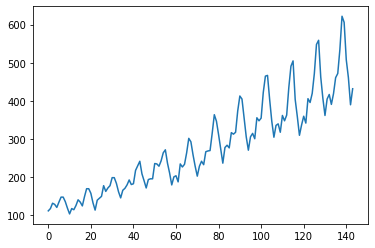

In [129]:
plt.plot(dataset)

In [130]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [0]:
train_size = 100
test_size = 44

In [132]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [133]:
test = dataset[train_size:, :]
test.shape

(44, 1)

###Build Training and Testing Dataset

In [0]:
def get_data(dataset, look_back):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [136]:
X_train.shape

(98, 1)

In [137]:
y_train.shape

(98,)

In [0]:
X_test, y_test = get_data(test, look_back)

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [140]:
X_train.shape

(98, 1, 1)

###Build the Model

In [0]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 1s 14ms/sample - loss: 0.0352
Epoch 2/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0163
Epoch 3/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0130
Epoch 4/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0119
Epoch 5/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0111
Epoch 6/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0100
Epoch 7/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0091
Epoch 8/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0082
Epoch 9/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0072
Epoch 10/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0062
Epoch 11/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0054
Epoch 12/50
98/98 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoc

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = scaler.inverse_transform(y_pred)

In [0]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

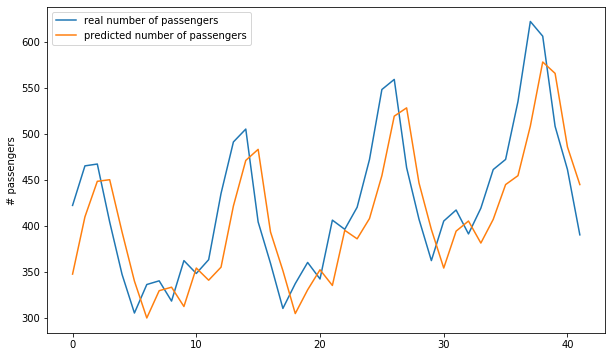

In [147]:
#plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()